# SHAP
- 머신러닝의 예측 결과를 해석하기 위한 기법
- 게임이론에 shaply값 을 기반으로 각 특성이 모델 예측에 영향을 미치는 정도를 정량적으로 측정

### shaply값
- 결과를 도출할때 플레이어(게임이론) , 특성이 협력하여 만든 결과에 대해 얼마나 기여했나

[수학적인 배경](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Math%20behind%20LinearExplainer%20with%20correlation%20feature%20perturbation.html)

In [1]:
# 라이브러리 임포트 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 임포트
data = load_breast_cancer()

In [9]:
# 데이터셋의 기본 정보 출력
print(data.DESCR)  # 데이터 설명
print(data.feature_names)  # 특성 이름
print(data.target_names)  # 출력 데이터 이름


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [4]:
# xgboost 모델 임포트
import xgboost as xgb

# 모델학습
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# shap 임포트
import shap

In [6]:
# shap explainer 설명

explainer  = shap.Explainer(model) 

In [7]:
shap_values = explainer(X_test) # LIME 이랑 차이점 , lime은 인스턴스, shap는 테스트셋 전체!

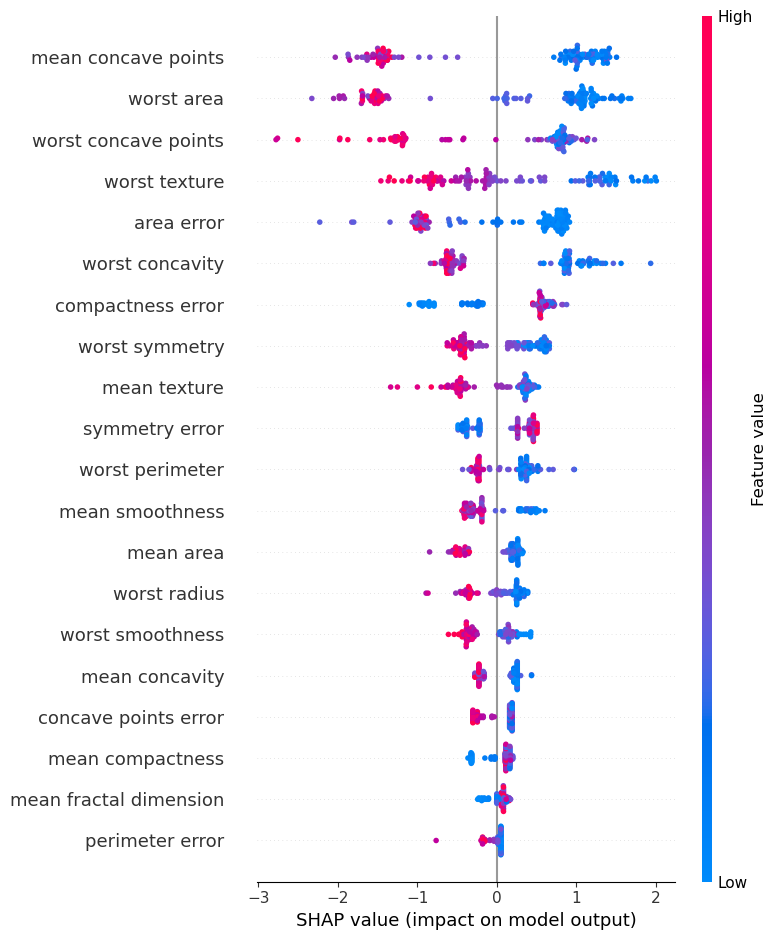

In [10]:
shap.summary_plot(shap_values, X_test, feature_names=data.feature_names)